# Guided Capstone Step 6. Documentation

**The Data Science Method**  


1.   Problem Identification 

2.   Data Wrangling 
  
3.   Exploratory Data Analysis 
 
4.   Pre-processing and Training Data Development

5.  Modeling

6.   **Documentation**
  * Review the Results
  * Finalize Code 
  * Finalize Documentation
  * Create a Project Report 
  * Create a Slide Deck for the Executive Audience

In this guided capstone we are going to revisit many of the actions we took in the previous guided capstone steps. This gives you the opportunity to practice the code you wrote to solve the questions in step 4 and 5. 

**<font color='teal'> Start by loading the necessary packages and printing out our current working directory just to confirm we are in the correct project directory. </font>**

In [1]:
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
#print current working directory
os.getcwd()

'C:\\Users\\tc18f\\Desktop\\springboard\\GuidedCapstone\\DataWrangling'

## Fit Models with Training Dataset

**<font color='teal'> Using sklearn fit the model you chose in Guided Capstone 5 on your training dataset. This includes: creating dummy features for states if you need them, scaling the data,and creating train and test splits before fitting the chosen model.Also, remember to generate a model performance score(MAE, or explained variance) based on the testing hold-out data set.</font>**

#### Best Model 

In [3]:
#model 1, dropping the unnamed column only
#read the csv into a dataframe and dropping the unnecessary columns
df = pd.read_csv('step3_output.csv')
df = df.drop(columns=['Unnamed: 0'])
df.head()

,Name,state,summit_elev,vertical_drop,trams,fastEight,fastSixes,fastQuads,quad,triple,...,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,clusters
0,Eaglecrest Ski Area,Alaska,2600,1540,0,0.0,0,0,0,0,...,640.0,60.000000,45.0,44.0,350.0,47.0,53.00000,90.0,0.0,1
1,Hilltop Ski Area,Alaska,2090,294,0,0.0,0,0,0,1,...,30.0,30.000000,150.0,36.0,69.0,30.0,34.00000,152.0,30.0,1
2,Sunrise Park Resort,Arizona,11100,1800,0,0.0,0,1,2,3,...,800.0,80.000000,115.0,49.0,250.0,74.0,78.00000,104.0,80.0,2
3,Yosemite Ski & Snowboard Area,California,7800,600,0,0.0,0,0,0,1,...,88.0,174.873239,110.0,84.0,300.0,47.0,47.00000,107.0,0.0,0
4,Boreal Mountain Resort,California,7700,500,0,0.0,0,1,1,3,...,380.0,200.000000,150.0,54.0,400.0,49.0,64.16681,150.0,200.0,0


## Review the results 

**<font color='teal'> Now, let's predict the Big Mountain Weekend price with our model in order to provide a recommendation to our managers on how to price the `AdultWeekend` lift ticket. First we need to find the row for Big Mountain resort in our data using string contains or string matching.</font>**

In [4]:
#find out which row it's in
df[df['Name'].str.contains('Big Mountain')]

,Name,state,summit_elev,vertical_drop,trams,fastEight,fastSixes,fastQuads,quad,triple,...,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,clusters
122,Big Mountain Resort,Montana,6817,2353,0,0.0,0,3,2,6,...,3000.0,600.0,123.0,72.0,333.0,81.0,81.0,123.0,600.0,0


In [5]:
df.iloc[122].T

Name                 Big Mountain Resort
state                            Montana
summit_elev                         6817
vertical_drop                       2353
trams                                  0
fastEight                              0
fastSixes                              0
fastQuads                              3
quad                                   2
triple                                 6
double                                 0
surface                                3
total_chairs                          14
Runs                                 105
TerrainParks                           4
LongestRun_mi                        3.3
SkiableTerrain_ac                   3000
Snow Making_ac                       600
daysOpenLastYear                     123
yearsOpen                             72
averageSnowfall                      333
AdultWeekday                          81
AdultWeekend                          81
projectedDaysOpen                    123
NightSkiing_ac  

**<font color='teal'> Prepare the Big Mountain resort data row as you did in the model fitting stage.</font>**

In [6]:
# first we import the preprocessing package from the sklearn library
from sklearn import preprocessing

# select the state column and make it into a dummie variable
dfo = df[['state']]
df = pd.concat([df.drop(dfo, axis=1), pd.get_dummies(dfo)], axis=1)
df.head()

# Declare an explanatory variable, called X,and assign it the result of dropping 'Name' and 'AdultWeekend' from the df
X = df.drop(['Name','AdultWeekend'], axis=1)

# Declare a response variable, called y, and assign it the AdultWeekend column of the df 
y = df['AdultWeekend']

# Here we use the StandardScaler() method of the preprocessing package, and then call the fit() method with parameter X 
scaler = preprocessing.StandardScaler().fit(X)

# Declare a variable called X_scaled, and assign it the result of calling the transform() method with parameter X 
X_scaled=scaler.transform(X) 

# Import the train_test_split function from the sklearn.model_selection utility.  
from sklearn.model_selection import train_test_split

# Get the 1-dimensional flattened array of our response variable y by calling the ravel() function on y
y = y.ravel()

# Call the train_test_split() function with the first two parameters set to X_scaled and y 
# Declare four variables, X_train, X_test, y_train and y_test separated by commas 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=1)

#Call model set
from sklearn import linear_model
from sklearn.metrics import explained_variance_score,mean_absolute_error
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)

**<font color='teal'> Predict the Big Mountain resort `Adult Weekend` price and print it out.</font>** This is our expected price to present to management. Based on our model given the characteristics of the resort in comparison to other ski resorts and their unique characteristics.

In [7]:
display(len(X_scaled))
print(len(df))
df.iloc[122]

266

266


Name                    Big Mountain Resort
summit_elev                            6817
vertical_drop                          2353
trams                                     0
fastEight                                 0
fastSixes                                 0
fastQuads                                 3
quad                                      2
triple                                    6
double                                    0
surface                                   3
total_chairs                             14
Runs                                    105
TerrainParks                              4
LongestRun_mi                           3.3
SkiableTerrain_ac                      3000
Snow Making_ac                          600
daysOpenLastYear                        123
yearsOpen                                72
averageSnowfall                         333
AdultWeekday                             81
AdultWeekend                             81
projectedDaysOpen               

In [8]:
#reshaping the array to fit in data prediciton
B = X_scaled[122].reshape(1, -1)
model.predict(B)

array([86.02530236])

**<font color='teal'> Print the Big Mountain resort actual `Adult Weekend` price.</font>**

In [9]:
df.iloc[122]['AdultWeekend']

81.0

**<font color='teal'> As part of reviewing the results it is an important step to generate figures to visualize the data story. We can use the clusters we added to our data frame to create scatter plots for visualizing the Adult Weekend values compared to other characteristics. Run the example below to get you started and build two or three more figures to include in your data story telling.</font>**

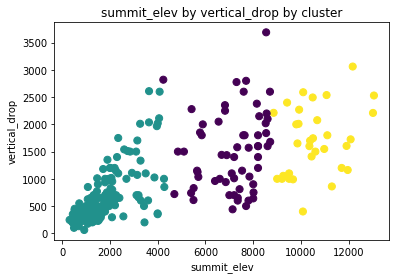

In [10]:
plt.scatter(df['summit_elev'], df['vertical_drop'], c=df['clusters'], s=50, cmap='viridis', label ='clusters')
#plt.scatter(df['summit_elev'], df['vertical_drop'], c='black', s=100)
plt.xlabel('summit_elev')
plt.ylabel('vertical_drop')
plt.title('summit_elev by vertical_drop by cluster')
plt.savefig('figures/fig1.png',bbox_inches='tight')
#the cluster colors shows us the resorts' summit elevation

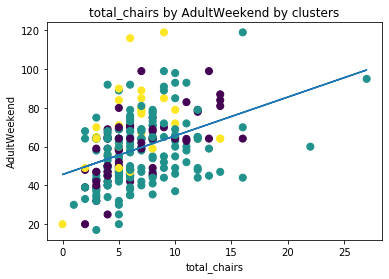

In [11]:
#big mountain has 14 total chairs, the point is slightly above regression line
#however, it's number 3 in out of 5 resorts with 14 total chairs
plt.scatter(df['total_chairs'], df['AdultWeekend'], c=df['clusters'], s=50, cmap='viridis', label ='clusters')
plt.xlabel('total_chairs')
plt.ylabel('AdultWeekend')
plt.title('total_chairs by AdultWeekend by clusters')

#regression line
m, b = np.polyfit(df['total_chairs'], df['AdultWeekend'], 1)
plt.plot(df['total_chairs'], m*df['total_chairs'] + b)

#save the figure to a file
plt.savefig('figures/fig2.png',bbox_inches='tight')
#from this plot, we can see that more chair lifts seems to have higher AdultWeekend prices, regardless of summit elevation
#so the addition of a new chairlift is definitely okay to increase the ticket price

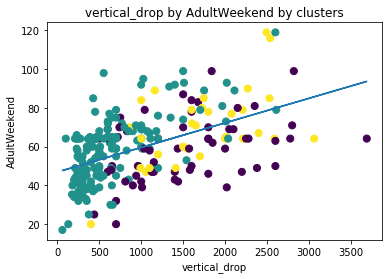

In [12]:
#big mountain has vertical drop of 2353, its point is slightly above regression line
plt.scatter(df['vertical_drop'], df['AdultWeekend'], c=df['clusters'], s=50, cmap='viridis', label ='clusters')
plt.xlabel('vertical_drop')
plt.ylabel('AdultWeekend')
plt.title('vertical_drop by AdultWeekend by clusters')

#regression line
m, b = np.polyfit(df['vertical_drop'], df['AdultWeekend'], 1)
plt.plot(df['vertical_drop'], m*df['vertical_drop'] + b)

#save the figure to a file
plt.savefig('figures/fig3.png',bbox_inches='tight')
#there seems to be a possitive correlation between the vertical drop and ticket price as well

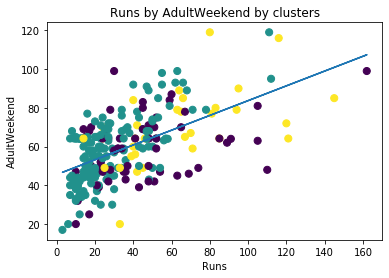

In [13]:
#big mountain has 105 runs, its point is sitting slightly below regression line
plt.scatter(df['Runs'], df['AdultWeekend'], c=df['clusters'], s=50, cmap='viridis', label ='clusters')
plt.xlabel('Runs')
plt.ylabel('AdultWeekend')
plt.title('Runs by AdultWeekend by clusters')

#regression line
m, b = np.polyfit(df['Runs'], df['AdultWeekend'], 1)
plt.plot(df['Runs'], m*df['Runs'] + b)

#save the figure to a file
plt.savefig('figures/fig4.png',bbox_inches='tight')
#similar to total chairs, the more runs seems to lead to higher ticket price as well

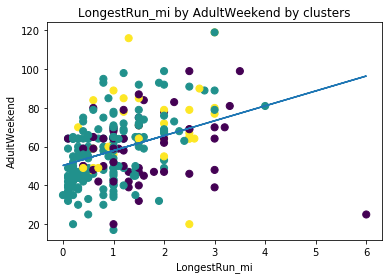

In [14]:
#big mountain has 3.3 longest run mi, its point is sitting slightly above regression line
plt.scatter(df['LongestRun_mi'], df['AdultWeekend'], c=df['clusters'], s=50, cmap='viridis', label ='clusters')
plt.xlabel('LongestRun_mi')
plt.ylabel('AdultWeekend')
plt.title('LongestRun_mi by AdultWeekend by clusters')

#regression line
m, b = np.polyfit(df['LongestRun_mi'], df['AdultWeekend'], 1)
plt.plot(df['LongestRun_mi'], m*df['LongestRun_mi'] + b)

#save the figure to a file
plt.savefig('figures/fig5.png',bbox_inches='tight')
#similar to total chairs, the longer longest run seems to lead to higher ticket price as well

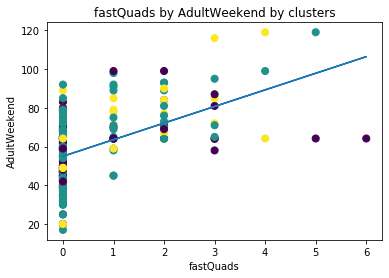

In [15]:
#big mountain has 3 fast quads, its point is slightly above regression line
plt.scatter(df['fastQuads'], df['AdultWeekend'], c=df['clusters'], s=50, cmap='viridis', label ='clusters')
plt.xlabel('fastQuads')
plt.ylabel('AdultWeekend')
plt.title('fastQuads by AdultWeekend by clusters')

#regression line
m, b = np.polyfit(df['fastQuads'], df['AdultWeekend'], 1)
plt.plot(df['fastQuads'], m*df['fastQuads'] + b)

#save the figure to a file
plt.savefig('figures/fig5.png',bbox_inches='tight')
#similar to total chairs, the more fastQuads seems to lead to higher ticket price as well

## Finalize Code

 Making sure our code is well organized and easy to follow is an important step. This is the time where you need to review the notebooks and Python scripts you've created and clean them up so they are easy to follow and succinct in nature. Addtionally, we will also save our final model as a callable object using Pickle for future use in a data pipeline. Pickle is a module that serializes (and de-serializes) Python objects so that they can become executable objects like functions. It's used extensively in production environments where machine learning models are deployed on an industrial scale!**<font color='teal'> Run the example code below to save out your callable model. Notice that we save it in the models folder we created in our previous guided capstone step.</font>** 

In [16]:
import pickle
s = pickle.dumps(model)
from joblib import dump, load
dump(model, 'models/regression_model_adultweekend.joblib') 

['models/regression_model_adultweekend.joblib']

## Finalize Documentation

For model documentation, we want to save the model performance metrics as well as the features included in the final model. You could also save the model perfomance metrics and coefficients of the other models you tried in case you want to refer to them later. **<font color='teal'> Create a dataframe containing the coefficients and the model performance metrics and save it out as a csv file, then upload it to your github repository.</font>** 

In [17]:
# Declare an explanatory variable, called X,and assign it the result of dropping 'Name' and 'AdultWeekend' from the df
X = df.drop(['Name','AdultWeekend'], axis=1)

# Declare a response variable, called y, and assign it the AdultWeekend column of the df 
y = df['AdultWeekend']

# Here we use the StandardScaler() method of the preprocessing package, and then call the fit() method with parameter X 
scaler = preprocessing.StandardScaler().fit(X)

# Declare a variable called X_scaled, and assign it the result of calling the transform() method with parameter X 
X_scaled=scaler.transform(X) 

# Get the 1-dimensional flattened array of our response variable y by calling the ravel() function on y
y = y.ravel()

# Call the train_test_split() function with the first two parameters set to X_scaled and y 
# Declare four variables, X_train, X_test, y_train and y_test separated by commas 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=1)

lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)

# Make a variable called y_pred and assign it the result of calling predict() on our model variable with parameter X_test
y_pred = model.predict(X_test)

In [18]:
#mode scores
#y_test and y_pred into the functions to evaluate the model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import explained_variance_score
print('explained variance score: ' + str(explained_variance_score(y_test, y_pred)))

from sklearn.metrics import mean_absolute_error
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

from sklearn.metrics import mean_squared_error
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

from sklearn.metrics import r2_score
print('R-Squared:', r2_score(y_test, y_pred))

#percent of standard deviation explained (1-square-root of (1-R-squared))
print('Percent of standard deviation explained:', str(np.sqrt(1-r2_score(y_test, y_pred))))

#model score (it seems to be the same as r-squared!)
print('model score: ' + str(model.score(X_test, y_test)))

#The intercept is the mean AdultWeekend price for all the resorts given the other characteristics
print('intercept (mean AdultWeekend price): ' + str(lm.intercept_))

#stnadard deviation
import statistics
print('Standard Deviation: ' + str(statistics.stdev(df['AdultWeekend'])))

explained variance score: 0.7246569140759163
Mean Absolute Error: 6.3461828010822945
Mean Squared Error: 75.32891930692097
Root Mean Squared Error: 8.679223427641494
R-Squared: 0.7217553112001687
Percent of standard deviation explained: 0.5274890414025976
model score: 0.7217553112001687
intercept (mean AdultWeekend price): 59.288974235013725
Standard Deviation: 17.263302606909342


In [19]:
# Write the model scores to dictionary then to csv
model_scores_dic = {
    "explained variance score": 0.7103702410742629,
    "Mean Absolute Error": 6.423310659289554,
    "Mean Squared Error": 79.698520533844,
    "Root Mean Squared Error": 8.927402787700576,
    "R-Squared": 0.7056151840783282,
    "Percent of standard deviation explained": 0.5425724061557792,
    "Mean AdultWeekend price": 59.34366936440826,
    "Standard Deviation": 17.263302606909342,
}

from pandas import DataFrame
model_scores = DataFrame(list(model_scores_dic.items()),columns = ['scoring classification', 'score']) 
model_scores.to_csv('C:\\Users\\tc18f\\Desktop\\springboard\\GuidedCapstone\\DataWrangling\\step6_model_score.csv')

In [25]:
#Calculate the correlation coefficients
corr = df.corr().round(2)
#list it in decending order
corr['AdultWeekend'].sort_values(ascending=False)

AdultWeekend            1.00
AdultWeekday            0.87
Runs                    0.58
vertical_drop           0.52
fastQuads               0.51
Snow Making_ac          0.47
total_chairs            0.40
daysOpenLastYear        0.39
LongestRun_mi           0.38
projectedDaysOpen       0.38
quad                    0.36
averageSnowfall         0.34
SkiableTerrain_ac       0.33
summit_elev             0.28
state_Vermont           0.25
triple                  0.24
state_New Hampshire     0.21
state_Utah              0.19
yearsOpen               0.18
TerrainParks            0.18
double                  0.16
NightSkiing_ac          0.15
state_West Virginia     0.15
clusters                0.13
state_California        0.12
state_Colorado          0.11
state_Maryland          0.07
state_Washington        0.07
state_Arizona           0.07
state_Pennsylvania      0.05
state_Virginia          0.04
state_New Jersey        0.02
state_North Carolina    0.02
state_Rhode Island      0.02
state_Tennesse

In [24]:
# Write the coefficient df to csv
corr['AdultWeekend'].sort_values(ascending=False).to_csv('C:\\Users\\tc18f\\Desktop\\springboard\\GuidedCapstone\\DataWrangling\\step6_corr.csv')

C:\Users\tc18f\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  
